In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
np.random.seed(42)

n_users = 500
data = {
    'User_ID': range(1, n_users + 1),
    'Usia': np.random.randint(15, 60, n_users),
    'Gender': np.random.choice(['Pria', 'Wanita'], n_users),
    'Provinsi': np.random.choice(['DKI Jakarta', 'Jawa Barat', 'Jawa Tengah', 'Jawa Timur', 'Luar Jawa'], n_users),
    'Jam_Per_Hari': np.random.normal(7.5, 2.5, n_users).clip(1, 16), # Rata-rata 7.5 jam
    'Aplikasi_Dominan': np.random.choice(['Social Media', 'Video Streaming', 'Gaming', 'Messaging', 'E-commerce'], n_users, p=[0.4, 0.2, 0.15, 0.15, 0.1])
}

df = pd.DataFrame(data)
df.to_csv('data_ponsel_indonesia', index=False)
print("Dataset is complete")

Dataset is complete


In [ ]:
rata_rata_jam_per_hari = df['Jam_Per_Hari'].mean()
print(f"Rata-rata jam per hari: {rata_rata_jam_per_hari:.2f} jam")

def kategori_usia(usia):
  if usia < 25: return 'Gen Z'
  elif usia < 40: return 'Millenial'
  elif usia < 55: return 'Gen X'
  else: return 'Baby Boomers'

df['Kategori_Usia'] = df['Usia'].apply(kategori_usia)
rata_per_usia = df.groupby('Kategori_Usia')['Jam_Per_Hari'].mean().sort_values(ascending=False)
print("\nRata-rata per kelompok usia:\n", rata_per_usia)

Rata-rata jam per hari: 7.79 jam

Rata-rata per kelompok usia:
 Kategori_Usia
Gen Z           7.929254
Gen X           7.900442
Baby Boomers    7.817893
Millenial       7.540860
Name: Jam_Per_Hari, dtype: float64


/tmp/ipython-input-1833641887.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Aplikasi_Dominan', palette='viridis', order=df['Aplikasi_Dominan'].value_counts().index)


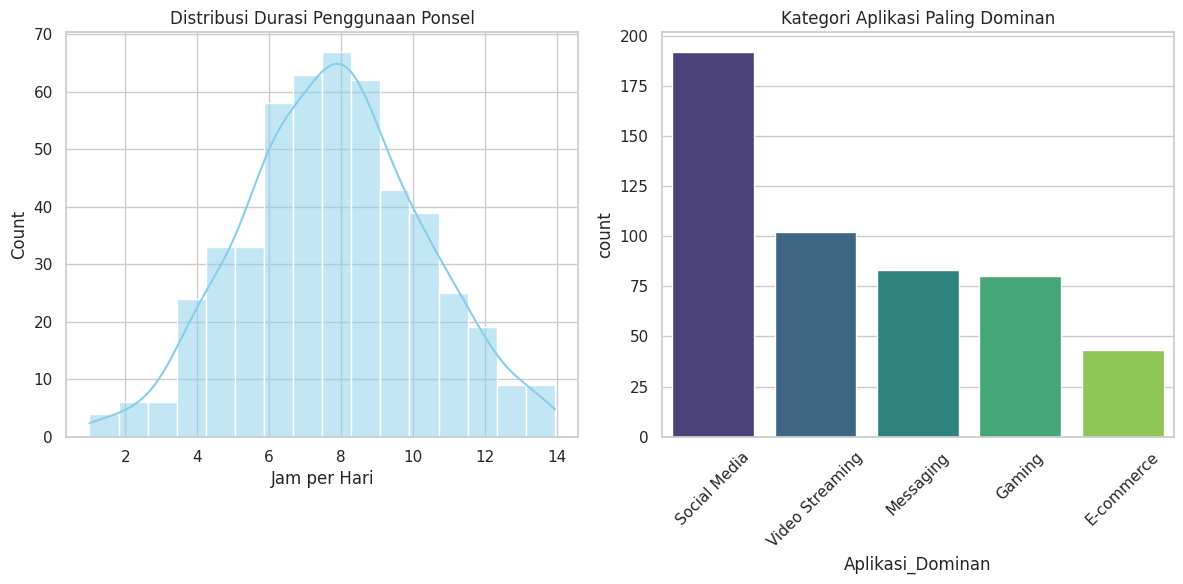

In [ ]:
# Mengatur gaya visualisasi
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot 1: Distribusi Jam Penggunaan
plt.subplot(1, 2, 1)
sns.histplot(df['Jam_Per_Hari'], kde=True, color='skyblue')
plt.title('Distribusi Durasi Penggunaan Ponsel')
plt.xlabel('Jam per Hari')

# Plot 2: Aplikasi Paling Banyak Digunakan
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Aplikasi_Dominan', palette='viridis', order=df['Aplikasi_Dominan'].value_counts().index)
plt.title('Kategori Aplikasi Paling Dominan')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()